In [12]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [13]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,release_date,speechiness,tempo,valence,year,year_bins,popularity_cut,popularity_cut_labels,popularity_qcut,popularity_qcut_labels
0,0,1.332319,['Carl Woitschach'],0.968662,158648,-1.097999,0,6KbQ3uYMLKb5jDxLF7wYDD,1.296562,10,...,1928,-0.289840,0.049500,0.940924,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
1,1,1.329664,"['Robert Schumann', 'Vladimir Horowitz']",-0.907636,282133,-1.776785,0,6KuQTIu1KoTTkLXKrwlLPV,2.389253,8,...,1928,-0.319186,-1.073199,-1.735454,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
2,2,0.294154,['Seweryn Goszczyński'],1.202486,104300,-1.004503,0,6L63VW0PibdM1HDSBoqnoM,-0.523513,5,...,1928,5.568626,-0.317996,1.325822,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
3,3,1.332319,['Francisco Canaro'],1.384983,180760,-1.341091,0,6M94FkXd15sOAOQYRnWPN8,2.343994,1,...,1928-09-25,-0.009722,-0.291114,0.716082,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"
4,4,1.319044,"['Frédéric Chopin', 'Vladimir Horowitz']",-1.871449,687733,-1.064341,0,6N6tiFZ9vLTSOIxkj8qKrd,2.411883,11,...,1928,-0.344530,-1.783425,-1.763655,1928,0,0,"(-0.1, 25.0]",0,"(-0.1, 25.0]"


In [14]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness','speechiness','tempo','valence']
# features = ['acousticness', 'danceability', 'energy',
#             'liveness', 'loudness','speechiness','tempo']
df_kmeans = df[features]

Explained variation per principal component: [0.34351661 0.15115648 0.12753335]


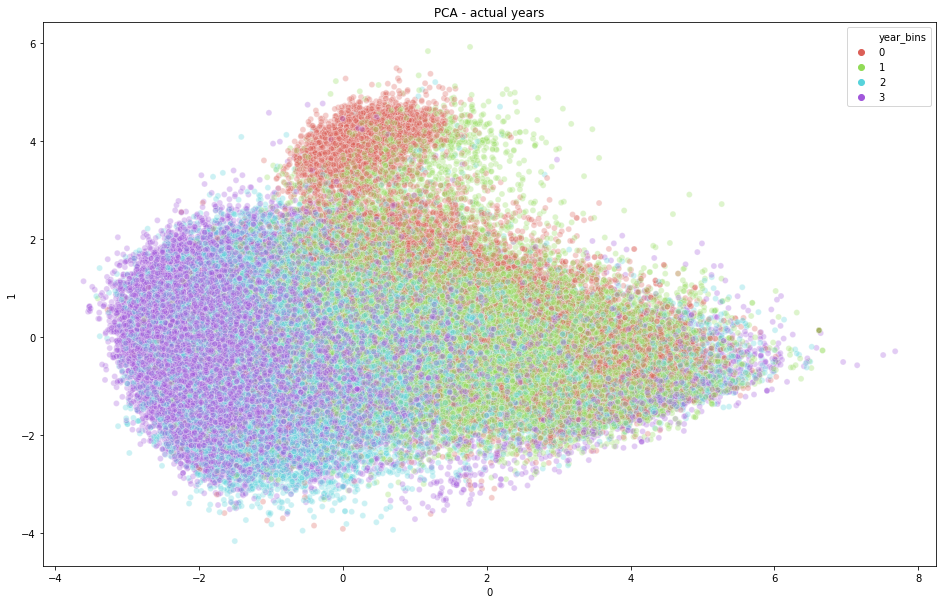

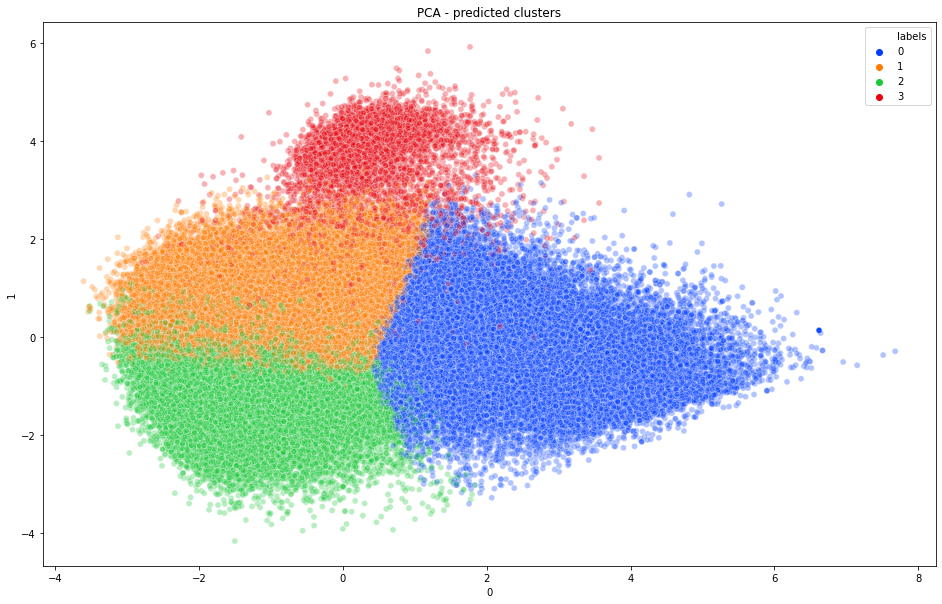

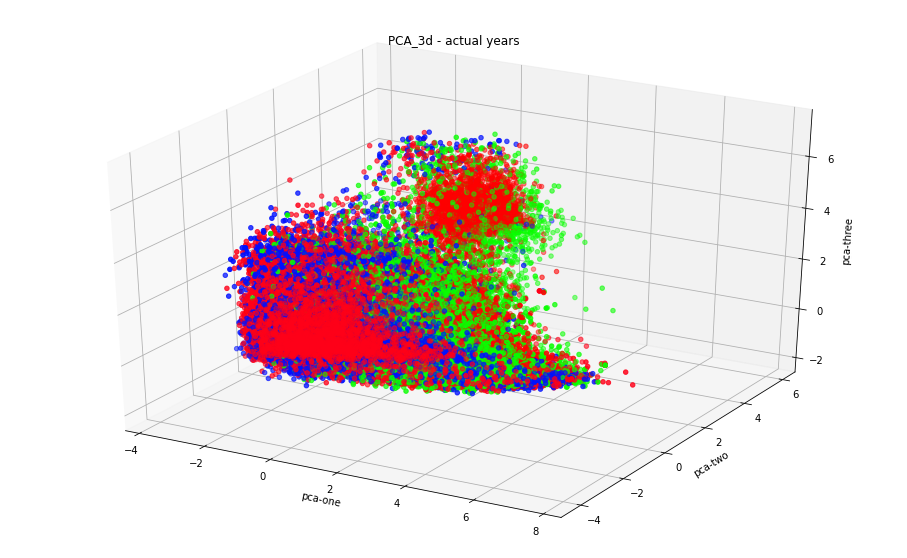

<Figure size 432x288 with 0 Axes>

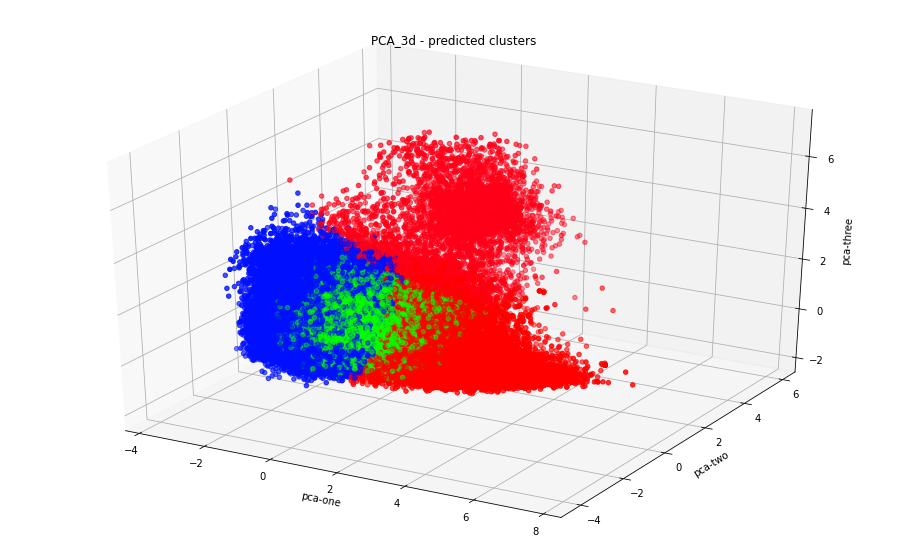

<Figure size 432x288 with 0 Axes>

In [15]:
### PCA with N Components = 3
### Also performed K Means
def doPCA(df):
    df_kmeans = df[features]
    pca = PCA(n_components = 3)
    X = pca.fit_transform(df_kmeans)
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    X_reduced = pd.DataFrame(X)
    X_reduced['year_bins'] = df['year_bins']
    X_new = pca.inverse_transform(X)
    X_new.shape
    return X_reduced, X_new

def doKmeans(X_new,X_reduced, n_clus=4):
    kmeans = KMeans(n_clusters=n_clus).fit(X_new)
    X_reduced['labels'] = kmeans.labels_
    X_reduced['year_bins'] = df['year_bins']
    return X_reduced
    

def plot2d(dataframe, color_variable, title, color="hls"):
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x=0, y=1,
        hue=color_variable,
        palette=sns.color_palette(color, 4),
        data=dataframe,
        legend="full",
        alpha=0.3)
    plt.title("PCA - "+title)
    plt.savefig('PCA_'+title+'.png')
    
def plot3d(df, color_variable,title, color='hsv'):
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
        xs=df[0], 
        ys=df[1], 
        zs=df[2], 
        c=df[color_variable], 
        cmap=color
    )
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    ax.set_title("PCA_3d - "+title)
    plt.show()
    plt.savefig('PCA_3d_'+title+'.png')

X_reduced, X_new = doPCA(df)
X_reduced = doKmeans(X_new,X_reduced)
plot2d(X_reduced, "year_bins","actual years")
plot2d(X_reduced, "labels","predicted clusters", color="bright")
plot3d(X_reduced, "year_bins", "actual years")
plot3d(X_reduced, "labels","predicted clusters")

In [35]:
X_new = pca.inverse_transform(X)
kmeans = KMeans(n_clusters=5).fit(X_new)

X_reduced = pca.transform(X_new)
X_reduced = pd.DataFrame(X_reduced)
X_reduced['labels'] = kmeans.labels_
X_reduced['year_bins'] = df['year_bins']

year0 = X_reduced[X_reduced['year_bins'] == 0]
year1 = X_reduced[X_reduced['year_bins'] == 1]
year2 = X_reduced[X_reduced['year_bins'] == 2]
year3 = X_reduced[X_reduced['year_bins'] == 3]
year4 = X_reduced[X_reduced['year_bins'] == 4]

In [151]:
df_year = year0

print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

232
5871
3855
4630
747


In [152]:
df_year = year1
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

752
13185
13542
4604
2835


In [153]:
df_year = year2
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

8361
14364
4711
1323
11241


In [154]:
df_year = year3
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

12532
7819
2920
1038
15691


In [155]:
df_year = year4
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

14987
5254
2004
526
16885


In [ ]:
# #Same but for genre
# df = pd.read_csv('~/Box/DSCI303/archive/final_data_genre.csv')
# def doPCA(df):
#     df_kmeans = df[features]
#     pca = PCA(n_components = 3)
#     X = pca.fit_transform(df_kmeans)
#     print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#     X_reduced = pd.DataFrame(X)
#     X_reduced['year_bins'] = df['year_bins']
#     X_reduced['genre'] = df[]
#     X_new = pca.inverse_transform(X)
#     return X_reduced, X_new

# def doKmeans(X_new,X_reduced, n_clus=5):
#     kmeans = KMeans(n_clusters=n_clus).fit(X_new)
#     X_reduced['labels'] = kmeans.labels_
#     X_reduced['year_bins'] = df['year_bins']
#     return X_reduced

# X_reduced, X_new = doPCA(df)
# X_reduced = doKmeans(X_new,X_reduced)
# plot2d(X_reduced, "year_bins","actual years")
# plot2d(X_reduced, "labels","predicted clusters", color="bright")
# plot3d(X_reduced, "year_bins", "actual years")
# plot3d(X_reduced, "labels","predicted clusters")